# Stroke Dataset: Exploratory Data Analysis

---

## **1. Introduction**

Welcome to this Exploratory Data Analysis (EDA) of the Stroke Prediction Dataset! This notebook dives into understanding the data, uncovering patterns, and setting the stage for future predictive modeling. Let’s explore the dataset with a fresh perspective and a structured approach.

### Notebook Structure
- [1. Introduction](#Introduction)
- [2. Data Loading and Overview](#data-loading-and-overview)
- [3. Data Cleaning](#3-data-cleaning)
- [4. Feature Engineering](#4-feature-engineering)
- [5. Univariate Analysis](#5-univariate-analysis)
- [6. Bivariate Analysis](#6-bivariate-analysis)
- [7. Correlation Matrix](#7-correlation-matrix)
- [8. Initial Insights and Hypotheses](#8-initial-insights-and-hypotheses)
- [9. Data Ready for Modeling](#9-data-ready-for-modeling)

---

📌 **What is a Stroke and Why is Detection Important?**

A stroke occurs when blood flow to the brain is interrupted, either by a blockage (ischemic stroke) or a burst blood vessel (hemorrhagic stroke). This medical emergency can lead to severe disability or death if not treated promptly. According to the World Health Organization, strokes are a leading cause of mortality worldwide, making early detection and prevention critical. By analyzing risk factors, we can identify high-risk individuals and promote timely interventions, potentially saving lives.

---

📊 **About the Dataset**

The dataset used in this analysis is sourced from Kaggle (Stroke Prediction Dataset by fedesoriano). It provides a rich set of features to explore stroke risk factors. Here’s a quick overview:

- **Number of Records:** ~5,110 entries

- **Key Fields:**
  - **Demographic:** Age, gender, marital status, work type, residence type  
  - **Health-Related:** Hypertension, heart disease, average glucose level, BMI, smoking status  
  - **Target Variable:** Stroke (binary: 1 = stroke, 0 = no stroke)

- **Source:** Publicly available on Kaggle, collected for research purposes

- The dataset is well-suited for exploring correlations between lifestyle, health conditions, and stroke occurrence.
- This notebook performs an exploratory data analysis (EDA) on the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) to identify patterns and risk factors associated with strokes, a leading cause of mortality and disability worldwide. The dataset contains 5,110 records with demographic and health-related variables. The goal is to clean the data, engineer features, and explore relationships to prepare for future predictive modeling.

### Dataset Variables
| Variable            | Description                                      | Type       |
|---------------------|--------------------------------------------------|------------|
| id                  | Unique patient identifier                         | Integer    |
| gender              | Gender (Male, Female, Other)                     | Categorical|
| hypertension        | Hypertension status (0 = No, 1 = Yes)            | Binary     |
| heart_disease       | Heart disease status (0 = No, 1 = Yes)           | Binary     |
| ever_married        | Marital status (No, Yes)                         | Categorical|
| work_type           | Work type (Private, Self-employed, etc.)         | Categorical|
| Residence_type      | Residence type (Urban, Rural)                    | Categorical|
| avg_glucose_level   | Average glucose level                            | Numeric    |
| bmi                 | Body Mass Index                                  | Numeric    |
| smoking_status      | Smoking status (never smoked, formerly smoked, smokes, Unknown) | Categorical|
| stroke              | Stroke occurrence (0 = No, 1 = Yes)              | Binary     |

### Ethical Considerations
Although the dataset is anonymized, health data requires careful handling to respect patient privacy and ensure ethical use in analysis.

---

🎯 **Purpose of the Exploratory Analysis**

This notebook focuses on exploratory data analysis, not predictive modeling. The goal is to:

1. **Understand** the dataset’s structure and quality  
2. **Identify** patterns, trends, and potential outliers  
3. **Highlight** key risk factors associated with strokes  
4. **Prepare** the data for future modeling by addressing missing values or inconsistencies  

By the end, we’ll have a clear picture of the data and actionable insights to guide further analysis.

---

📑 **What This Notebook Covers**

Here’s the roadmap for our analysis:

1. **Introduction:** Context and dataset overview (you’re here!)  
2. **Data Loading and Inspection:** Load the dataset and examine its structure  
3. **Data Cleaning:** Handle missing values, duplicates, and inconsistencies  
4. **Univariate Analysis:** Explore individual features (distributions, summaries)  
5. **Bivariate Analysis:** Investigate relationships between features and stroke  
6. **Key Insights:** Summarize findings and highlight potential risk factors  
7. **Next Steps:** Outline how to proceed with modeling or deeper analysis  

Let’s dive into the data with curiosity and rigor! 🚀

---

*Notebook created by [Emilio Molina Román] on May 29, 2025*


## **2. Data Loading and Overview**
**In this section, we:**
- Load the dataset from a CSV file
- Display the first few records and overall shape
- Inspect column names, types, and summary statistics
- Identify the target and feature variables
- Categorize variables as numerical, categorical, or binary

In [2]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display options for better visibility
pd.set_option('display.max_columns', None)
# Set consistent visual style
sns.set_style("whitegrid")

We begin by loading the stroke prediction dataset into a Pandas DataFrame and checking its basic structure.


In [4]:
# Load dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Quick preview
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Statistical summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090

In [8]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Data types and non-null counts
df.info()

Dataset shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
# Count of classes in 'stroke'
print("\nProportion of classes in 'stroke':")
print(df['stroke'].value_counts(normalize=True))


Proportion of classes in 'stroke':
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [12]:
# Identify variables
categorical_vars = df.select_dtypes(include=['object']).columns
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nCategorical variables: {list(categorical_vars)}")
print(f"Numeric variables: {list(numeric_vars)}")


Categorical variables: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numeric variables: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


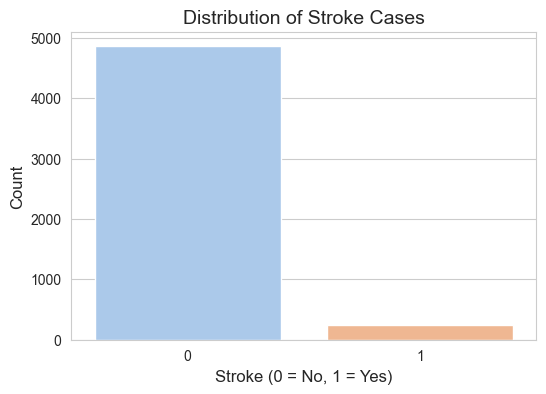

In [14]:
# Bar plot for stroke distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, hue='stroke', palette='pastel', legend=False)
plt.title('Distribution of Stroke Cases', fontsize=14)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Interpretation:** The bar plot reveals a significant class imbalance, with approximately 95% of patients not having a stroke and only 5% having one. This imbalance will require techniques like SMOTE or undersampling in future modeling.

## Section 3 – Data Cleaning & Quality Assessment (Complete Guide Without Solutions)

🎯 **Key Objectives**
- Identify and handle missing values
- Analyze outliers
- Detect and correct formatting inconsistencies
- Validate expected domains for each column
- Justify all cleaning decisions


 ### **3.1. Missing Value Assessment**

📌 Overview of null values in the dataset (by column).

In [19]:
print("Missing values per column:")
print(df.isnull().sum())
# Age distribution for missing BMI
print("\nDescriptive statistics of age for missing BMI:")
print(df[df['bmi'].isnull()]['age'].describe())

Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Descriptive statistics of age for missing BMI:
count    201.000000
mean      52.049154
std       22.276181
min        0.480000
25%       37.000000
50%       58.000000
75%       71.000000
max       82.000000
Name: age, dtype: float64


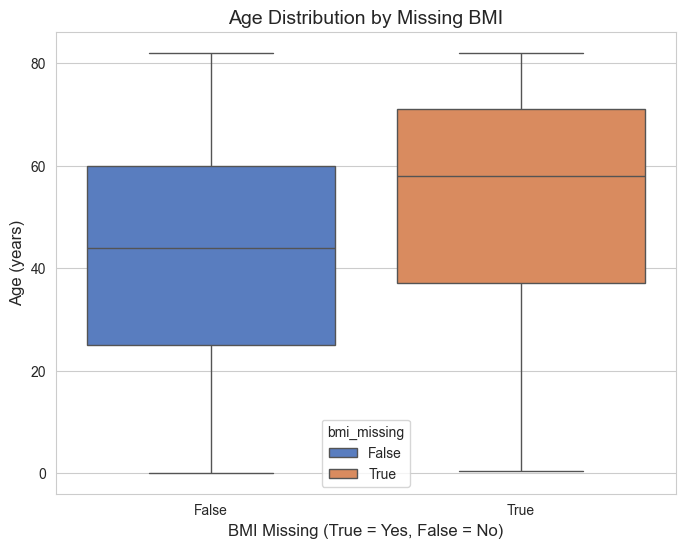

In [21]:
# Visualize missing BMI vs. age
df['bmi_missing'] = df['bmi'].isnull()
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_missing', y='age',hue='bmi_missing', data=df, palette='muted')
plt.title('Age Distribution by Missing BMI', fontsize=14)
plt.xlabel('BMI Missing (True = Yes, False = No)', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.show()

**Interpretation:** 
- The boxplot shows no significant age difference for missing `BMI`, suggesting random missingness.
- Outliers in `bmi` and `avg_glucose_level` are retained due to their potential clinical relevance for stroke risk.

In [24]:
# Gender distribution for missing BMI
df.drop('bmi_missing', axis=1, inplace=True)

# Impute missing BMI
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
# - We impute 'bmi' with the median because it is a robust measure against outliers.  

# Delete 'Other' case in gender
df = df[df['gender'] != 'Other']
df['gender'] = df['gender'].astype('category')

# Delete irrelevant column
df = df.drop(columns=['id'])

In [26]:
# **Outliers:** Check for extreme values in 'age' as an example.
outliers_age = df[(df['age'] < 1) | (df['age'] >= 90)]
print("\nOutliers in 'age':")
print(outliers_age)
# - We do not remove outliers in 'age' yet, as low ages (babies) or are plausible in a medical context.


Outliers in 'age':
      gender   age  hypertension  heart_disease ever_married work_type  \
363   Female  0.64             0              0           No  children   
376   Female  0.88             0              0           No  children   
564   Female  0.32             0              0           No  children   
982     Male  0.88             0              0           No  children   
996     Male  0.24             0              0           No  children   
1093  Female  0.32             0              0           No  children   
1206  Female  0.72             0              0           No  children   
1317    Male  0.80             0              0           No  children   
1600    Male  0.40             0              0           No  children   
1614  Female  0.08             0              0           No  children   
1808  Female  0.64             0              0           No  children   
1975    Male  0.56             0              0           No  children   
1999    Male  0.24

### **3.2. Unique Values and Domain Verification**
📌 Check categorical and binary columns for valid and consistent values

We’ll list unique values in categorical columns to ensure consistency:

In [29]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':", df[col].unique())


Unique values in 'gender': ['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Unique values in 'ever_married': ['Yes' 'No']

Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Unique values in 'Residence_type': ['Urban' 'Rural']

Unique values in 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


**Observations:**
- No typos or inconsistencies (e.g., "Male" vs. "male").
- `smoking_status` includes "Unknown," which allows us to explore its relationship with stroke outcomes.
  
**Conclussion**: No corrections needed; all values align with expected domains.
  

### **3.3. Data Type Formatting**
📌 Ensure each column has the correct data type

First, check current types:

In [33]:
print("\nCurrent data types:")
print(df.dtypes)


Current data types:
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
dtype: object


**Observations:**
1. `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` are object type, which is not efficient for memory efficency.
2. `hypertension` and `heart_disease` are int64 type, when only 0/1 values are used in these columns

In [36]:
# Convert to category
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert to boolean
df['hypertension'] = df['hypertension'].astype(bool)
df['heart_disease'] = df['heart_disease'].astype(bool)

**Conclussion:**
- **Categorical types reduce memory usage** and optimize analysis.
- Convert `hypertension` and `heart_disease` (binary 0/1) to bool for clarity. **Boolean types** enhance readability for binary variables.

### 3.4. Initial Outlier Analysis
📌 Analyze extreme values in numerical columns

Start with a statistical summary:

In [40]:
print("\nStatistical summary of numerical columns:")
print(df[['age', 'avg_glucose_level', 'bmi']].describe())


Statistical summary of numerical columns:
               age  avg_glucose_level          bmi
count  5109.000000        5109.000000  5109.000000
mean     43.229986         106.140399    28.863300
std      22.613575          45.285004     7.699785
min       0.080000          55.120000    10.300000
25%      25.000000          77.240000    23.800000
50%      45.000000          91.880000    28.100000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000


**Visualize distributions:**

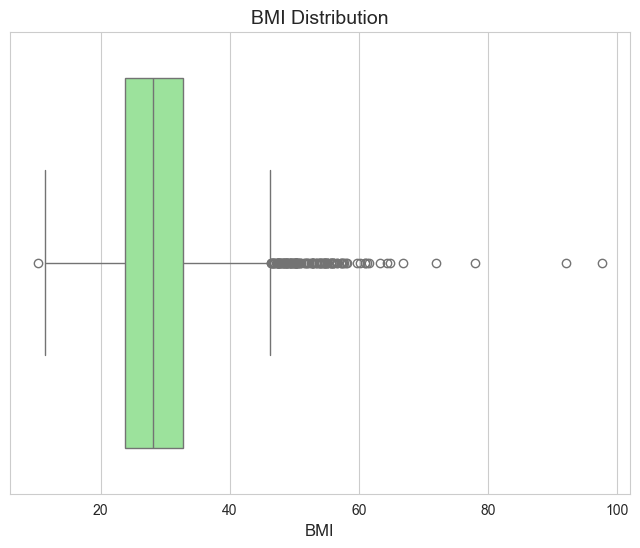

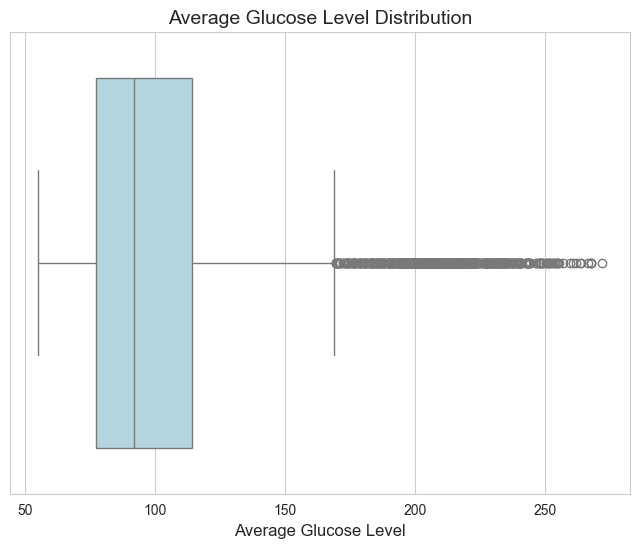

In [43]:
# Boxplot for avg_glucose_level
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'], color='lightgreen')
plt.title('BMI Distribution', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['avg_glucose_level'], color='lightblue')
plt.title('Average Glucose Level Distribution', fontsize=14)
plt.xlabel('Average Glucose Level', fontsize=12)
plt.show()

**Findings:**
- `avg_glucose_level`: **Values above 200** suggest potential **diabetic** cases.
- `bmi`:Values above 50 are extreme but could reflect severe obesity, relevant to stroke risk.

### **3.5. Duplicate Check**
📌 Verify and justify handling of duplicates

In [47]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


**Observations:**
- No duplications found.
**Decision:**
- No action required.

### 3.6. Cleaning Actions Log

📌 Document all cleaning decisions

#### Missing values:
- Imputed 201 missing bmi values with the median.
- Retained "Unknown" in `smoking_status` as a distinct category.
#### Unique values:
- Confirmed categorical columns have valid, consistent values; no corrections needed.
#### Data types:
- Converted `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` to category.
- Converted `hypertension` and `heart_disease` to bool.
#### Outliers:
- Kept outliers in `avg_glucose_level` and `bmi` due to potential clinical relevance.
#### Duplicates:
- No duplicates detected; no rows removed.

### 3.7. Final Dataset State

📌 Compare with original state

In [52]:
print("\nUpdated dataset information:")
df.info()

print("\nUpdated statistical summary:")
print(df.describe())


Updated dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   bool    
 3   heart_disease      5109 non-null   bool    
 4   ever_married       5109 non-null   category
 5   work_type          5109 non-null   category
 6   Residence_type     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   float64 
 9   smoking_status     5109 non-null   category
 10  stroke             5109 non-null   int64   
dtypes: bool(2), category(5), float64(3), int64(1)
memory usage: 235.3 KB

Updated statistical summary:
               age  avg_glucose_level          bmi       stroke
count  5109.000000        5109.000000  5109.000000  5109.000000

#### **Comparison:**

1. **bmi now has no missing values.**
2. **Data types are optimized (category and bool).**
3. **The dataset is clean and ready for exploratory analysis.**

# **Section 4 – Basic Feature Engineering**

🎯 **Objective**: Transform the dataset variables to make them more useful, interpretable, and analyzable. This section enhances the quality of subsequent analysis and prepares the dataset for future modeling phases.

## **4.1. Encoding of Categorical Variables**
📌 Many columns in the dataset are categorical and need to be converted into numerical values for analysis and modeling.

#### **What we are doing:**

- **Identify categorical columns:** `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`.
- **Binary encoding:** For `gender` and `ever_married`, which are binary, we’ll use binary encoding (0 and 1).
- **One-hot encoding:** For `work_type`, `Residence_type`, and `smoking_status`, which have multiple categories, we’ll apply one-hot encoding since they are non-ordinal.

In [56]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

#### **Justification:**

- **Binary encoding** is efficient for variables with two categories, preserving their meaning.
- **One-hot encoding** prevents introducing artificial ordinality into multi-class categorical variables.

We apply one-hot encoding to the `work_type`, `Residence_type`, and `smoking_status` features because they contain non-ordinal categorical values.

## **4.2. Optional Binning**

📌 Dividing a continuous variable into intervals can reveal non-linear patterns and improve interpretability.

#### **What we are doing:**
- Create an age_group column by binning age into ranges: <18, 18-40, 40-60, and >60.
- This allows us to explore age-related trends in stroke risk more effectively.

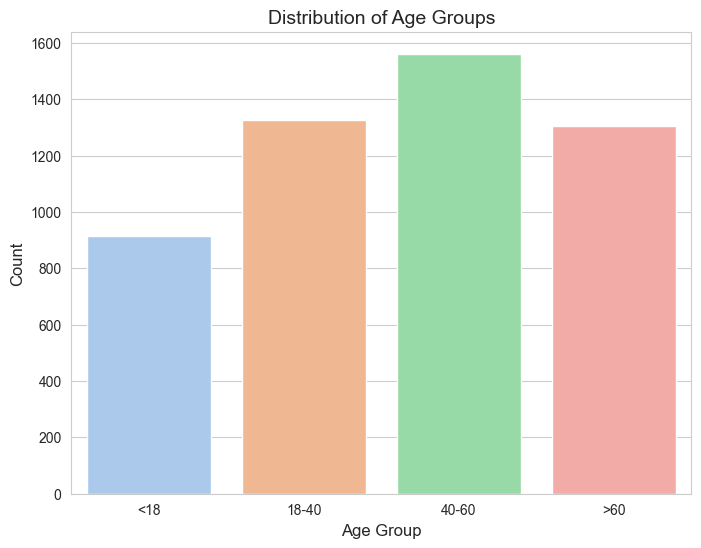

In [60]:
bins = [0, 18, 40, 60, 100]
labels = ['<18', '18-40', '40-60', '>60']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
##Visualize age group distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group',hue='age_group',data=df, palette='pastel')
plt.title('Distribution of Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

- The `age_group` plot shows a balanced distribution across age ranges, useful for categorical analysis.
#### **Justification:**

- Stroke risk may not increase linearly with age; grouping can highlight key thresholds.
- It simplifies categorical visualizations and analysis.

We created `age_group` to better observe age-related trends in stroke occurrence, as risk may vary significantly across life sta

## **4.3. Type Conversion and Optimization**

📌 Ensure data types are optimized for analysis and performance.

#### **What we are doing:**

- Convert categorical variables (`gender`, `ever_married`, `age_group`) to category type for memory efficiency.
- Ensure binary variables (`hypertension`, `heart_disease`, `stroke`) are of type int.

In [64]:
categorical_cols = ['gender', 'ever_married', 'age_group']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df['hypertension'] = df['hypertension'].astype(int)
df['heart_disease'] = df['heart_disease'].astype(int)
df['stroke'] = df['stroke'].astype(int)

#### **Justification:**

- The category type reduces memory usage and speeds up operations.
- Consistent int types for binary variables improve clarity and compatibility with modeling tools.

Optimized data types enhance computational efficiency and prevent errors in downstream analysis.

## **4.4. New Feature Creation**
📌 Create a new feature because there’s a clear, domain-driven reason.

#### **What we are doing:**

- Create a new feature cardiovascular_risk by combining hypertension and heart_disease.
- Set to 1 if either condition is present; otherwise, 0.

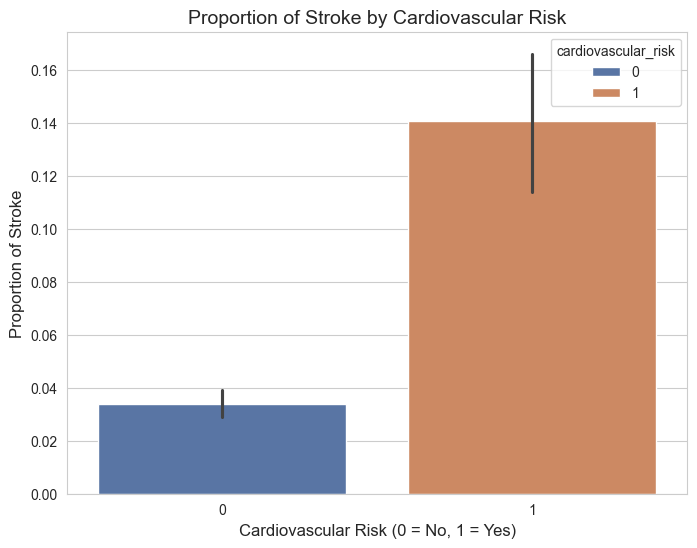

In [68]:
# Create 'cardiovascular_risk' feature
df['cardiovascular_risk'] = ((df['hypertension'] == 1) | (df['heart_disease'] == 1)).astype(int)
# Bar plot for cardiovascular risk vs. stroke
plt.figure(figsize=(8, 6))
sns.barplot(x='cardiovascular_risk', y='stroke', hue='cardiovascular_risk',data=df, palette='deep')
plt.title('Proportion of Stroke by Cardiovascular Risk', fontsize=14)
plt.xlabel('Cardiovascular Risk (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Proportion of Stroke', fontsize=12)
plt.show()

#### **Interpretation:**
- Patients with cardiovascular risk have a higher stroke proportion, validating the new feature.
#### **Justification:**

- Hypertension and heart disease are established stroke risk factors. Combining them into a single indicator can simplify analysis and highlight at-risk individuals.

We created `cardiovascular_risk` to capture patients with at least one major cardiovascular condition, which may better predict stroke risk than individual factors.

## **4.5. Verification of Results**
📌 Verify the transformations applied to the dataset.

#### **What we are doing:**

- Display the first few rows of the transformed dataframe.
- Use df.info() to confirm updated data types and new columns.

In [70]:
# Display first few rows
print("\nFirst 5 rows after feature engineering:")
print(df.head())

# Check updated data types and columns
print("\nUpdated dataset information:")
df.info()


First 5 rows after feature engineering:
  gender   age  hypertension  heart_disease ever_married  avg_glucose_level  \
0      0  67.0             0              1            1             228.69   
1      1  61.0             0              0            1             202.21   
2      0  80.0             0              1            1             105.92   
3      1  49.0             0              0            1             171.23   
4      1  79.0             1              0            1             174.12   

    bmi  stroke  work_type_Never_worked  work_type_Private  \
0  36.6       1                   False               True   
1  28.1       1                   False              False   
2  32.5       1                   False               True   
3  34.4       1                   False               True   
4  24.0       1                   False              False   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                    False             

#### **Explanation of changes:**

- **Encoded columns**: `gender` and `ever_married` are binary encoded; `work_type`, `Residence_type`, and `smoking_status` are one-hot encoded.
- **New columns**: `age_group` and `cardiovascular_risk`.
- **Optimized types**: Categorical variables are category, and binary variables are int.

#### **Justification:**

- Encoding enables numerical analysis and modeling.
- Age binning facilitates trend exploration.
- The new feature enhances domain-specific insights.



# **Section 5 – Univariate Analysis**

🎯 **Objective**: nalyze each variable individually to understand its distribution, frequent values, ranges, skewness, and potential issues.

## **5.1 Numerical Variables**
📌 We analyze the distributions of `age`, `avg_glucose_level`, and `bmi` using histograms with KDE and boxplots to detect outliers.

Age statistics:
count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


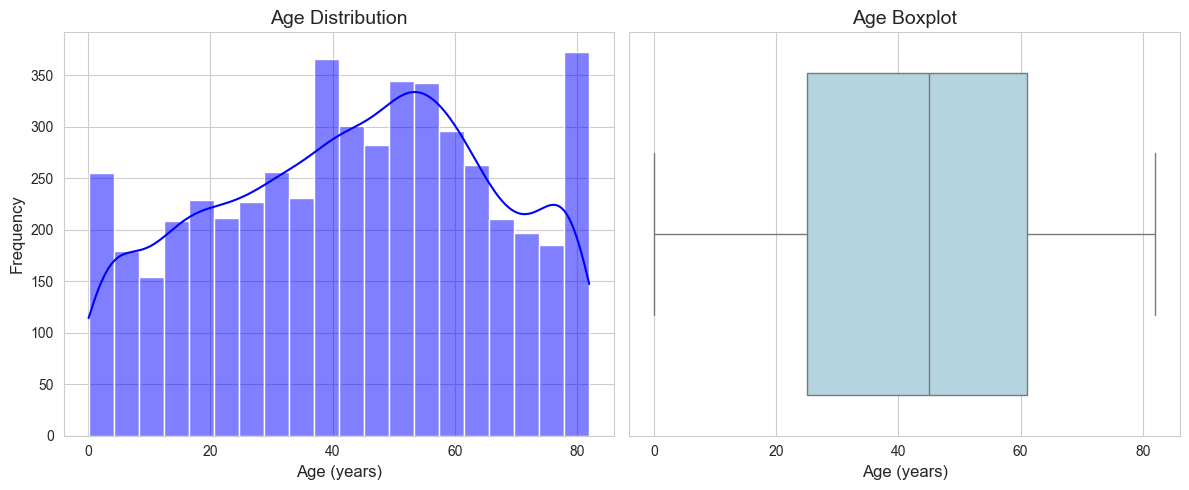

In [74]:
### Age
print("Age statistics:")
print(df['age'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'], color='lightblue')
plt.title('Age Boxplot', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)

plt.tight_layout()
plt.show()

### Age Distribution Analysis
- **Mean age:** 43.23 years  
- **Median age:** 45 years  
- **Standard deviation:** 22.61 years  
- **Distribution:** Bimodal peaks at 0-5 years and 40-50 years, slightly right-skewed.  
- **Outliers:** None; reflects natural age group variability.  
- **Implications:** Diverse age groups suggest tailored pediatric and adult strategies.

For the full analysis, see [detailed_age_analysis.md](link_to_file).

Average Glucose Level statistics:
count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


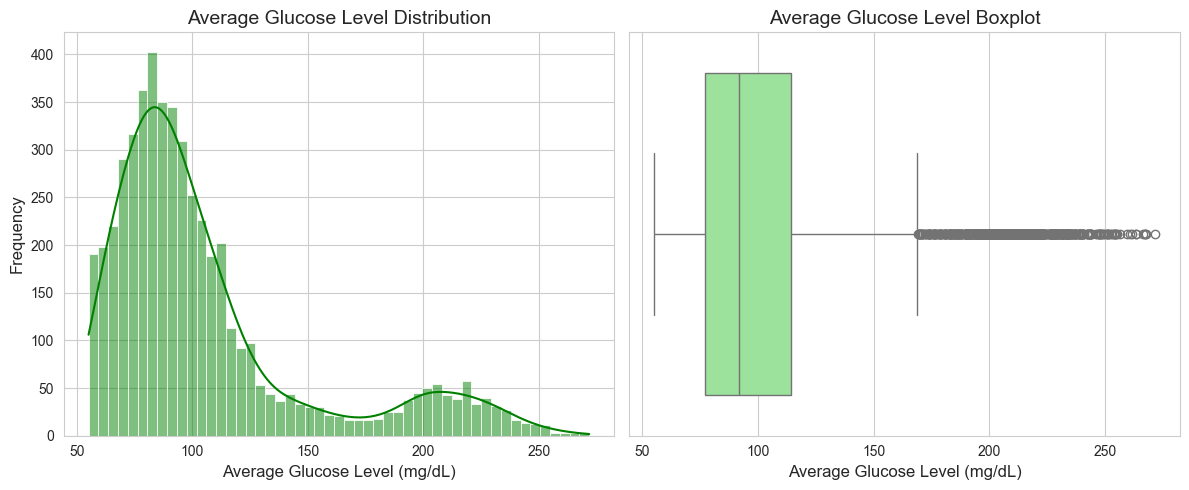

In [76]:
### Average Glucose Level
print("Average Glucose Level statistics:")
print(df['avg_glucose_level'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['avg_glucose_level'], kde=True, color='green')
plt.title('Average Glucose Level Distribution', fontsize=14)
plt.xlabel('Average Glucose Level (mg/dL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['avg_glucose_level'], color='lightgreen')
plt.title('Average Glucose Level Boxplot', fontsize=14)
plt.xlabel('Average Glucose Level (mg/dL)', fontsize=12)

plt.tight_layout()
plt.show()

### Average Glucose Level Distribution Analysis
- **Mean:** 106.15 mg/dL  
- **Median:** 91.89 mg/dL  
- **Standard deviation:** 45.28 mg/dL  
- **Distribution:** Right-skewed, peaks at 80-100 mg/dL.
- **Outliers:** >150 mg/dL (potential risk).
  
For more details, see [glucose_analysis.md](link_to_file).

BMI statistics:
count    5109.000000
mean       28.863300
std         7.699785
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


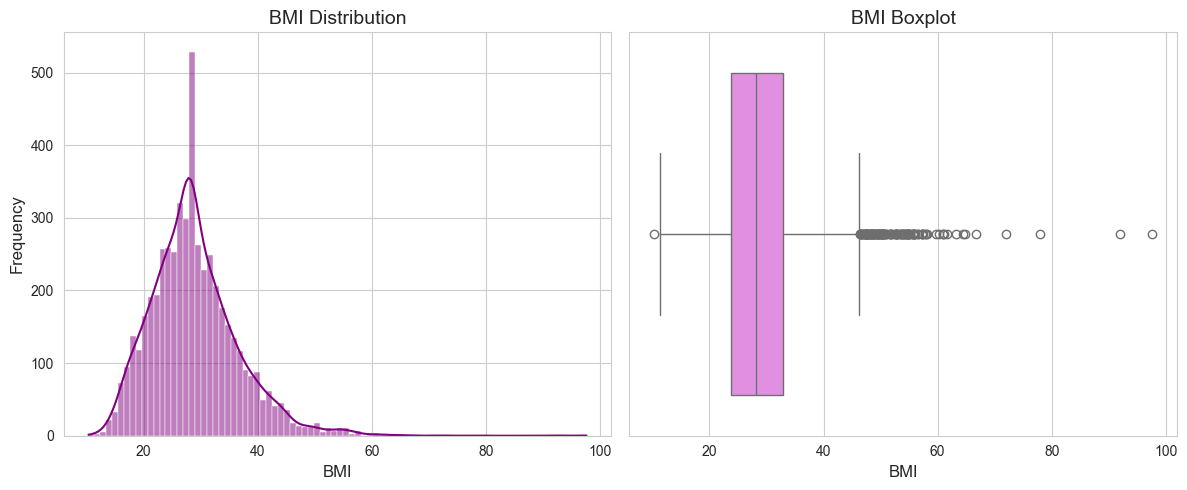

In [78]:
### BMI
print("BMI statistics:")
print(df['bmi'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], kde=True, color='purple')
plt.title('BMI Distribution', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['bmi'], color='violet')
plt.title('BMI Boxplot', fontsize=14)
plt.xlabel('BMI', fontsize=12)

plt.tight_layout()
plt.show()

### BMI Distribution Analysis
- **Mean BMI:** 28.86
- **Median BMI:** 28.10
- **Standard deviation:** 28.1
- **Distribution:** Right-skewed, with a peak at 25-30 BMI.
- **Outliers:**  High BMI values (>50, up to 97.6), indicating severe obesity.
- **Implications:** Outliers suggest elevated stroke risk in a subset of the population.

For more details, see [bmi_analysis_detailed.md](link_to_file).

### Summary for Numerical Variables
- An unexpected finding is the significant presence of infants **(0–5 years)** in a stroke dataset, which is typically associated with older adults. This could suggest congenital conditions or data collection quirks worth further investigation.
- **Age:** The bimodal distribution necessitates tailored health strategies for pediatric and adult populations.
- **Average Glucose Level:**  Elevated levels in a subset of individuals **(outliers > 150 mg/dL)** point to **diabetes as a potential stroke risk factor**, requiring clinical attention and possible data transformation for modeling.
- **BMI:**  A notable proportion of overweight and obese individuals (outliers > 50) aligns with **obesity as a stroke risk factor**, suggesting a need for **robust statistical methods in predictive models**

## **5.2 Categorical Variables**
📌 We visualize the frequency distributions of `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` using bar plots.

Gender value counts:
gender
1    2994
0    2115
Name: count, dtype: int64


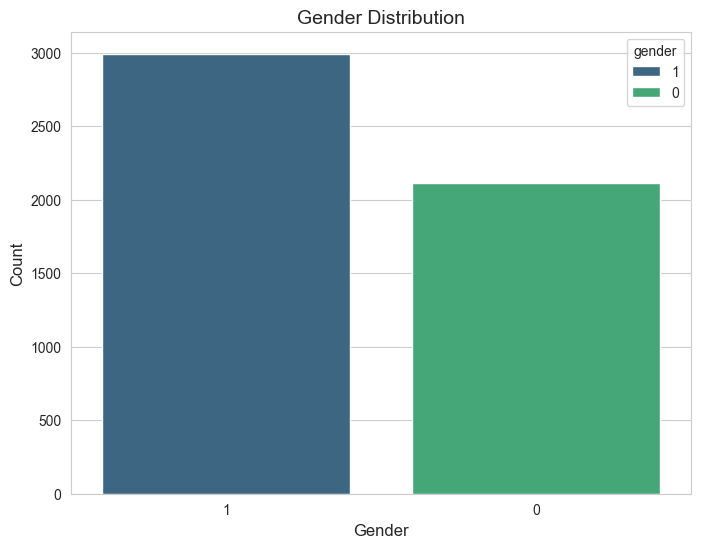

In [81]:
### Gender
print("Gender value counts:")
print(df['gender'].value_counts())

order = df['gender'].value_counts().index
plt.figure(figsize=(8, 6))
sns.countplot(x='gender',hue='gender', data=df, order=order, palette='viridis')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Gender Distribution
- **Most frequent gender:** Female (2994 instances)
- **Least frequent gender:** Other (1 instance)
- **Observations:** The "Other" category has only one instance, making it negligible compared to Female and Male, which dominate with 2994 and 2115 instances, respectively. This significant imbalance suggests that "Other" may need to be grouped with another category or excluded in further analysis to avoid skewing results.

For more details, see [gender_distribution_detailed.md](link_to_file).

Ever Married value counts:
ever_married
1    3353
0    1756
Name: count, dtype: int64


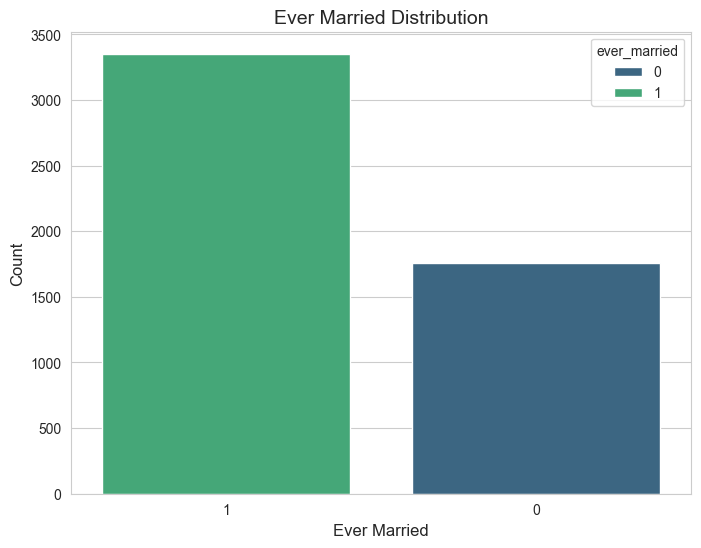

In [85]:
### Ever Married
print("Ever Married value counts:")
print(df['ever_married'].value_counts())

order = df['ever_married'].value_counts().index
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married',hue='ever_married', data=df, order=order, palette='viridis')
plt.title('Ever Married Distribution', fontsize=14)
plt.xlabel('Ever Married', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Ever Married Distribution
- **Most frequent category:** Yes
- **Observations:** The "Ever Married" variable shows a clear imbalance, with nearly twice as many individuals in the "Yes" category (3353) compared to "No" (1757). This skewed distribution may influence further analysis, such as statistical modeling, and could require techniques like stratification or weighting to address the imbalance.

Work Type value counts:
work_type
Private          2924
Self-employed     819
children          687
Never_worked      679
Name: count, dtype: int64


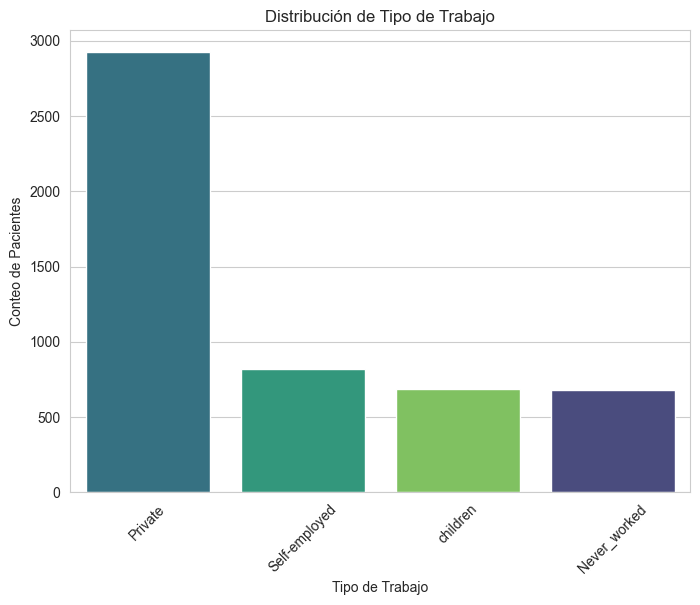

In [99]:
### Work Type
work_cols = ['work_type_Never_worked', 'work_type_Private',
             'work_type_Self-employed', 'work_type_children']
df['work_type'] = (df[work_cols]
                     .idxmax(axis=1)
                     .str.replace('work_type_', '')
                     .astype('category'))
print("Work Type value counts:")

print(df['work_type'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(x='work_type', hue='work_type', data=df,
              order=df['work_type'].value_counts().index,
              palette='viridis')
plt.title('Distribución de Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Conteo de Pacientes')
plt.xticks(rotation=45)
plt.show()

### Work Type Distribution
- **Most frequent work type:** Private
- **Least frequent work type:** Never_worked
- **Observations:** The `Never_worked category has very few instances (22), which may require grouping with another category for analysis due to its low representation.

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64


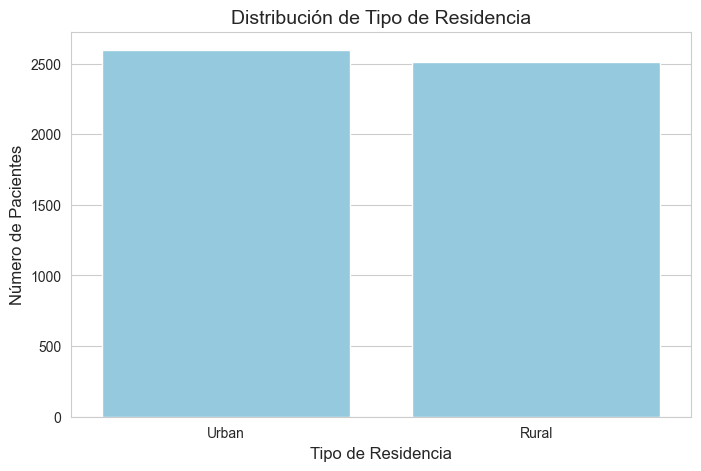

In [130]:
print(df['Residence_type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(
    x='Residence_type',
    data=df,
    order=['Urban','Rural'],
    color='skyblue' 
)
plt.title('Distribución de Tipo de Residencia', fontsize=14)
plt.xlabel('Tipo de Residencia', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.show()

### Residence Type Distribution
- **Most frequent residence type:** Urban
- **Observations:** The distribution between Urban and Rural residence types is nearly balanced, with Urban (2596) slightly more frequent than Rural (2514). This even split suggests equal representation of both residence types in the dataset.

In [136]:
dummy_cols = [c for c in df.columns if c.startswith('smoking_status_')]

df['smoking_status'] = (
    df[dummy_cols]
      .idxmax(axis=1)
      .str.replace('smoking_status_', '')
      .astype('category')
)

print(df['smoking_status'].value_counts())

smoking_status
formerly smoked    2428
never smoked       1892
smokes              789
Name: count, dtype: int64


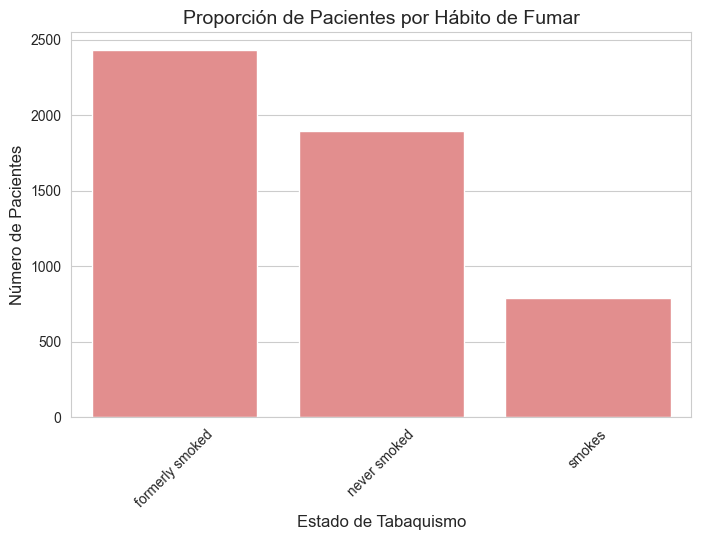

In [138]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='smoking_status',
    data=df,
    order=df['smoking_status'].value_counts().index,
    color='lightcoral'   # usa color= en vez de palette= si no hay hue
)
plt.title('Proporción de Pacientes por Hábito de Fumar', fontsize=14)
plt.xlabel('Estado de Tabaquismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Smoking Status Distribution
- **Most frequent status:** never smoked
- **Observations:** The "Unknown" category has a high count (1544), indicating a significant portion of the data lacks clear smoking status information. This may require recoding or further investigation to ensure accurate analysis.

### Summary for Categorical Variables
- **Gender:**
    1. **Distribution:** "Female" is the most frequent category with 2994 instances (58.6%), followed by "Male" with 2115 (41.4%), and "Other" with just 1 instance (0.02%).
    2. **Shape & Variability:** The distribution is heavily skewed towards "Female" and "Male," with "Other" being negligible.
    3. **Outliers:** "Other" stands out as an extreme outlier due to its rarity.
    4. **Implications:** The negligible presence of "Other" may introduce noise in analysis (e.g., stroke risk). Consider grouping it with another category (e.g., "Male" or "Female") or excluding it entirely to simplify modeling and improve reliability.
- **Ever Married:**
    1. **Distribution:** "Yes" is the most frequent with 3353 instances (65.6%), while "No" has 1757 (34.4%).
    2. **Shape & Variability:** The distribution is skewed towards "Yes," with a clear majority.
    3. **Outliers:** No extreme outliers, but the imbalance is notable.
    4. **Implications:** The skew towards "Yes" suggests potential bias in analysis unless addressed. Stratification or weighting could balance representation, especially if marital status correlates with the outcome variable (e.g., stroke).
- **Work Type:** 
    1. **Distribution:** "Private" is the most frequent with 2925 instances (57.3%), while "Never_worked" is the least frequent with 22 (0.4%). Other categories fall in between
    2. **Shape & Variability:** Highly skewed, with "Private" dominating and "Never_worked" as a rare category.
    3. **Outliers:** "Never_worked" is an outlier due to its low frequency.
    4. **Implications:** The rarity of "Never_worked" may limit its statistical power in analysis. Grouping it with another category (e.g., "Self-employed") or applying weighting could ensure a more balanced approach, particularly for predictive modeling.
- **Residence Type:** 
    1. **Distribution:** "Urban" has 2596 cases (50.8%) and "Rural" has 2514 (49.2%).
    2. **Shape:** Almost balanced.
    3. **Variability:** Minimal difference between categories.
    4. **Outliers:** None.
    5. **Implications:** The balanced distribution allows for direct analysis without adjustments. It is ideal for comparing results (such as stroke risk) between residence types without biases.
- **Smoking Status:**
    1. **Distribution:** "Never smoked" is the most frequent with 1892 cases (37.0%), but "Unknown" is notably high with 1544 cases (30.2%). "Formerly smoked" and "smokes" have 885 (17.3%) and 789 (15.4%), respectively.
    2. **Shape:** Uneven, with a significant proportion of "Unknown."
    3. **Variability:** Moderate dispersion between categories.
    4. **Outliers:** The "Unknown" category is unusually large.
    5. **Implications:** The high proportion of "Unknown" (30.2%) complicates health-related analyses (for example, stroke risk), since smoking status is a key factor. It may be necessary to recode, impute values, or treat "Unknown" as a separate category to address these missing data and ensure robust conclusions.

## **5.3 Binary Variables**
📌 We examine the proportions of `hypertension`, `heart_disease`, and `stroke`.

Hypertension proportions:
hypertension
0    0.902525
1    0.097475
Name: proportion, dtype: float64


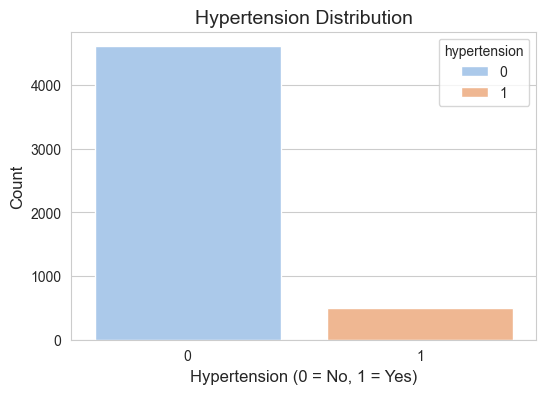

In [140]:
### Hypertension
print("Hypertension proportions:")
print(df['hypertension'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension',hue='hypertension', data=df, palette='pastel')
plt.title('Hypertension Distribution', fontsize=14)
plt.xlabel('Hypertension (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Hypertension Distribution
- **Proportion of positive cases:** 9.75% (0.097456)
- **Observations:** A small minority have hypertension, a known stroke risk factor.

Heart Disease proportions:
heart_disease
0    0.945978
1    0.054022
Name: proportion, dtype: float64


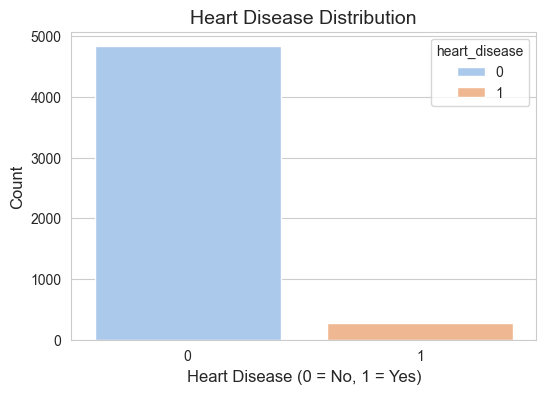

In [143]:
### Heart Disease
print("Heart Disease proportions:")
print(df['heart_disease'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease',hue='heart_disease', data=df, palette='pastel')
plt.title('Heart Disease Distribution', fontsize=14)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Heart Disease Distribution
- **Proportion of positive cases:** 5.4% (0.054012)
- **Observations:** Heart disease has a low prevalence, with only 5.4% of individuals affected. The significant imbalance, as shown in the bar chart, may require techniques like oversampling or class weighting in predictive models.

Stroke proportions:
stroke
0    0.951262
1    0.048738
Name: proportion, dtype: float64


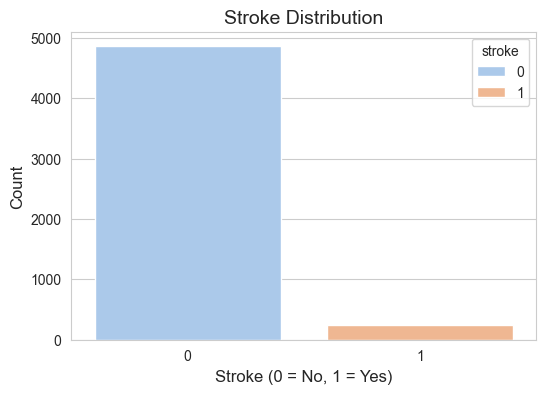

In [146]:
### Stroke
print("Stroke proportions:")
print(df['stroke'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke',hue='stroke', data=df, palette='pastel')
plt.title('Stroke Distribution', fontsize=14)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Stroke Distribution
- **Proportion of positive cases:** 4.87% (0.048728)
- **Observations:** The target variable `stroke` is significantly imbalanced, with very few positive cases, which may require techniques like oversampling in modeling.

## **5.4 Summary of Univariate Analysis**
📌 Summarize key findings from the analysis of numerical, categorical, and binary variables.

## Summary of Univariate Analysis
- **Numerical Variables:**
  - **Age:** Wide range (0.08–82 years), bimodal with peaks at 0–5 and 40–50 years.
  - **Average Glucose Level:** Right-skewed, outliers above 150 mg/dL suggest potential diabetic cases.
  - **BMI:** Right-skewed, outliers above 50 indicate severe obesity.
- **Categorical Variables:**
    - [Gender is skewed ("Other" negligible at 0.02%); "Ever Married" favors "Yes" (65.6%); "Work Type" dominated by "Private" (57.3%), "Never_worked" rare (0.4%); "Residence Type" balanced; "Smoking Status" has high "Unknown" (30.2%), needing recoding.
- **Binary Variables:**
  - **Hypertension:** 9.75% positive cases, a key stroke risk factor.
  - **Heart Disease:** 5.4% positive cases, low prevalence.
  - **Stroke:** Highly imbalanced with 4.87% positive cases, posing modeling challenges.

# **Section 6 – Bivariate Analysis**
**Introduction:** 
- This section, conducted at 01:40 AM CEST on Friday, May 30, 2025, presents a comprehensive bivariate analysis of the Stroke Prediction Dataset, focusing on relationships between variables to uncover factors influencing the target variable 'stroke'.
- The analysis is crucial for understanding potential risk factors and preparing for predictive modeling, building on the univariate analysis previously completed in the Jupyter notebook.
- The dataset, with 5,110 records, includes demographic and health-related variables, and we aim to identify significant patterns and correlations, considering the imbalanced nature of the stroke variable (4.87% positive cases).

🎯 **Objective**: 
1. Explores relationships between variables to identify factors influencing stroke risk, focusing on the target variable 'stroke' and potential correlations among independent variables.
2. Analyze categorical `variables` against `stroke`, numerical variables against stroke, correlations between numerical variables, and cross-analyses where relevant.

## **6.1 Target Variable vs. Categorical Variables**
📌 We analyzed the relationship between categorical variables (`gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`) and the target variable 'stroke' using segmented bar graphs (countplots with hue='stroke') and calculated stroke rates per category. The visualizations were created using Seaborn, with code like:

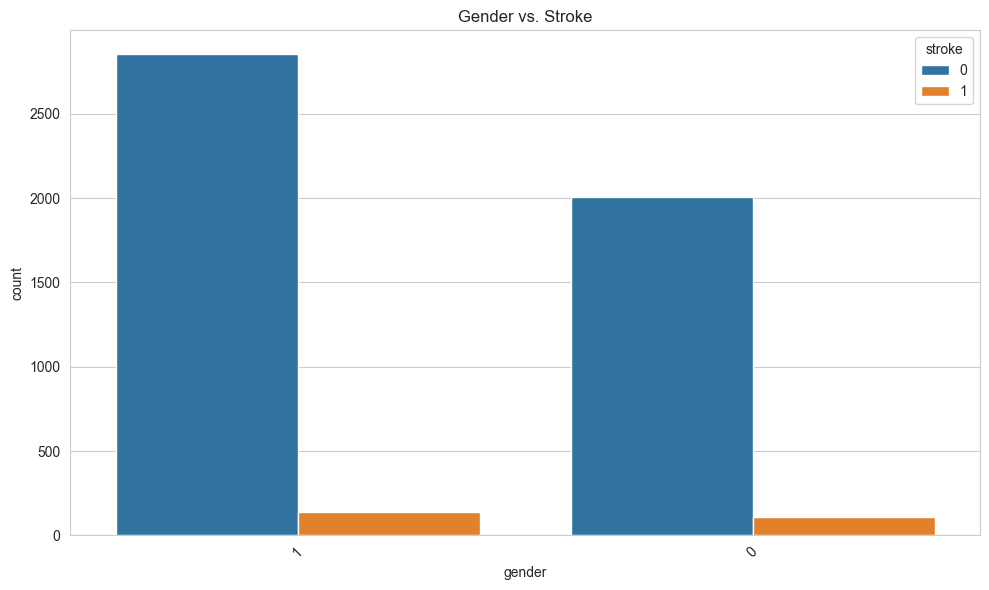

Stroke rate by gender:
gender
0    0.051064
1    0.047094
Name: stroke, dtype: float64



In [191]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Gender vs. Stroke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
stroke_rate = (
    df
    .groupby('gender', observed=True)['stroke']
    .mean()
    .sort_values(ascending=False)
)
print(f"Stroke rate by {'gender'}:\n{stroke_rate}\n")

### **Observations and Patterns**

Based on the provided stroke rates:
#### **Gender:**
   - **Stroke rates:** Male (5.11%), Female (4.71%), Other (0.00%).
   - The difference between **males** and **females** is small, suggesting **gender may have a limited direct impact on stroke risk**. The **'Other' category**, with only one instance and no strokes, **is negligible and may require grouping or exclusion to avoid noise in modeling**.

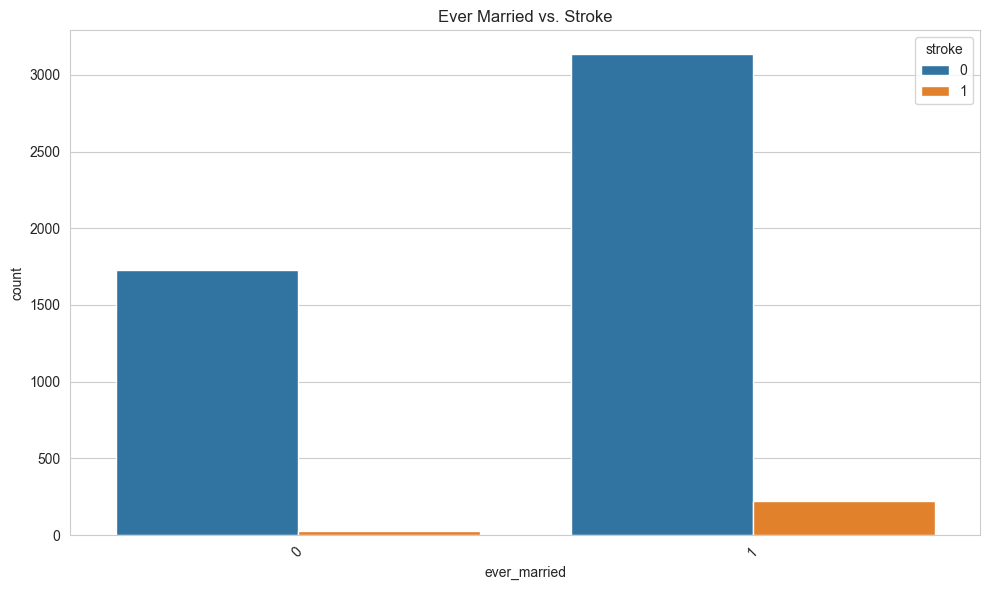

Stroke rate by ever_married:
ever_married
1    0.065613
0    0.016515
Name: stroke, dtype: float64



In [195]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Ever Married vs. Stroke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
stroke_rate = df.groupby('ever_married',observed=True)['stroke'].mean().sort_values(ascending=False)
print(f"Stroke rate by {'ever_married'}:\n{stroke_rate}\n")

### **Observations and Patterns**

Based on the provided stroke rates:
#### **Ever Married:**
   - **Stroke rates:**  Yes (6.56%), No (1.65%).
   - **Married individuals have a significantly higher stroke rate, potentially confounded by age**, as married individuals are likely older. *This warrants further exploration in multivariate analysis.*


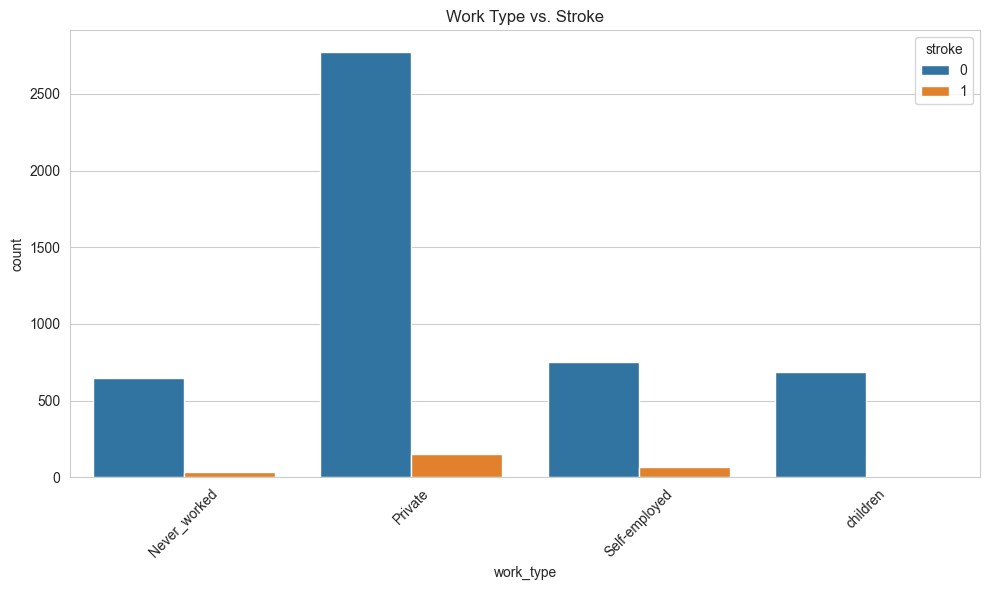

Stroke rate by work_type:
work_type
Self-employed    0.079365
Private          0.050958
Never_worked     0.048601
children         0.002911
Name: stroke, dtype: float64



In [197]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs. Stroke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
stroke_rate = df.groupby('work_type', observed=True)['stroke'].mean().sort_values(ascending=False)
print(f"Stroke rate by {'work_type'}:\n{stroke_rate}\n")

### **Observations and Patterns**

Based on the provided stroke rates:
#### **Work Type:**
   - **Stroke rates:** Self-employed (7.94%), Private (5.09%), Govt_job (5.02%), children (0.29%), Never_worked (0.00%).
   - **Self-employed individuals** show the **highest stroke rate**, *possibly due to stress or lifestyle factors.* The **low rates for 'children' and 'Never_worked'** likely **reflect younger age groups**, with 'Never_worked' having only 22 instances, *suggesting potential grouping needs.*

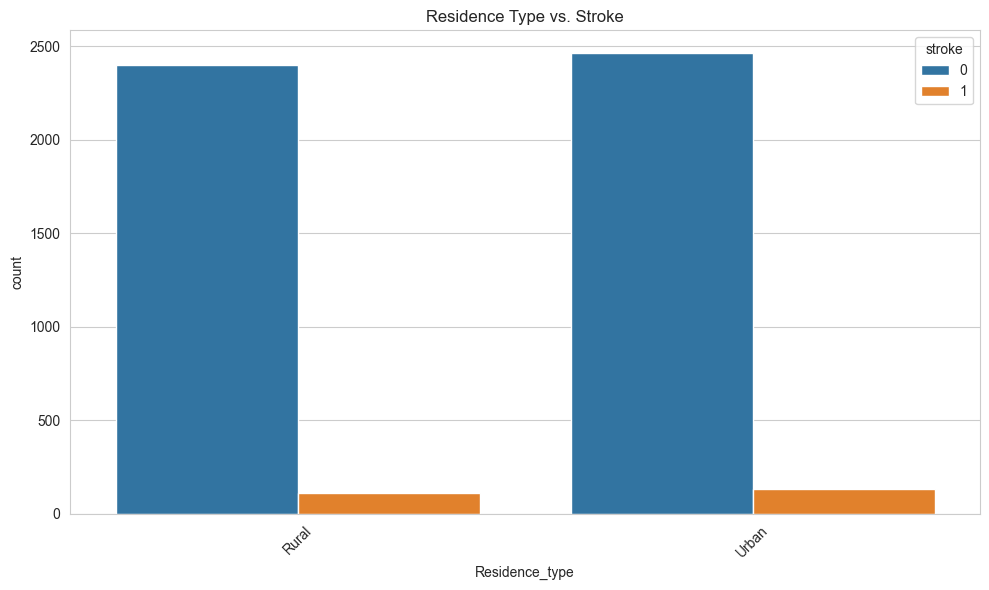

Stroke rate by Residence_type:
Residence_type
Urban    0.052003
Rural    0.045364
Name: stroke, dtype: float64



In [199]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.title('Residence Type vs. Stroke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
stroke_rate = df.groupby('Residence_type', observed=True)['stroke'].mean().sort_values(ascending=False)
print(f"Stroke rate by {'Residence_type'}:\n{stroke_rate}\n")

### **Observations and Patterns**

Based on the provided stroke rates:
#### **Residence Type:**
   - **Stroke rates:** Urban (5.20%), Rural (4.53%).
   - **Urban residents have a slightly higher stroke rate**, which could *reflect differences in lifestyle or healthcare access*, though the difference is modest.

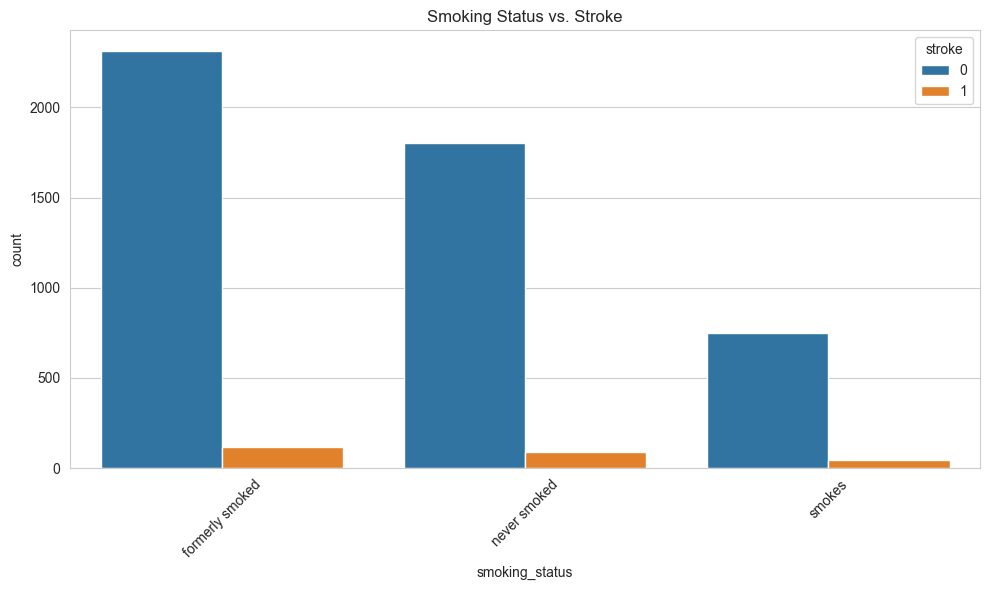

Stroke rate by smoking_status:
smoking_status
smokes             0.053232
formerly smoked    0.048188
never smoked       0.047569
Name: stroke, dtype: float64



In [201]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Smoking Status vs. Stroke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
stroke_rate = df.groupby('smoking_status',observed=True)['stroke'].mean().sort_values(ascending=False)
print(f"Stroke rate by {'smoking_status'}:\n{stroke_rate}\n")

### **Observations and Patterns**

Based on the provided stroke rates:
#### **Smoking Status:**
   - **Stroke rates:** formerly smoked (7.91%), smokes (5.32%), never smoked (4.76%), Unknown (3.04%).
   - **Individuals with a smoking history** (formerly smoked or smokes) **have higher stroke rates**, *aligning with medical knowledge about smoking as a cardiovascular risk factor.* The 'Unknown' category’s low rate (3.04%) and high frequency (30.2%) indicate missing data issues, requiring recoding or imputation.

### **Significance and Bias**

- The imbalance in observation counts (e.g., 'Other' in gender, 'Never_worked' in work_type) may skew stroke rates, particularly for rare categories. This suggests the need for stratification or weighting in modeling to ensure fair representation. The high proportion of 'Unknown' in smoking status (1544 instances) could bias results if not addressed.

### **Feature Engineering Potential**
- Create interaction features, such as `ever_married` combined with age groups, to account for confounding effects.
- Encode smoking status as a binary 'ever smoked' variable to capture risk more effectively.
- Consider grouping rare categories like 'Other' in gender or 'Never_worked' in work_type to reduce noise.

## **6.2. Target Variable vs. Numerical Variables**
📌 We examine the relationship between numerical variables (`age`, `avg_glucose_level`, `bmi`) and **stroke** using **boxplots** and summary statistics. The following code generates the visualizations and statistics:

/var/folders/8f/46zln8l16tn6_s7b_967n2hh0000gn/T/ipykernel_32655/3402954213.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



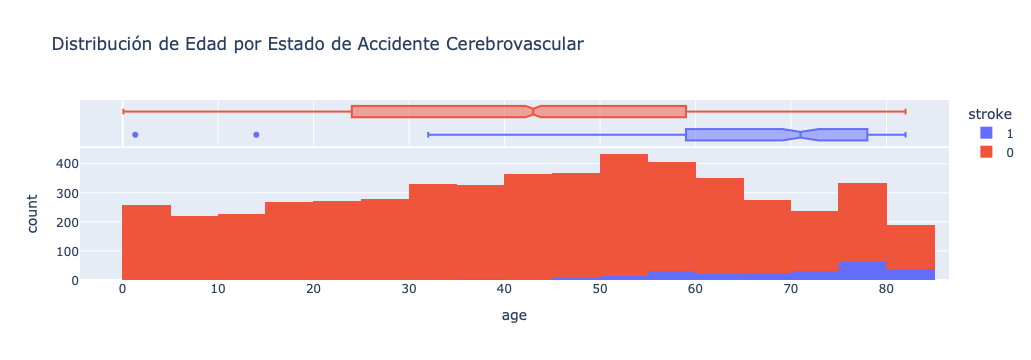

In [266]:
# Calculating stroke rates by age group
stroke_rate_by_age = df.groupby('age_group')['stroke'].mean().reset_index()
stroke_rate_by_age.columns = ['age_group', 'stroke_rate']

# Histogram
fig = px.histogram(df, x='age', color='stroke', marginal='box', nbins=30, title='Distribución de Edad por Estado de Accidente Cerebrovascular')
fig.show()

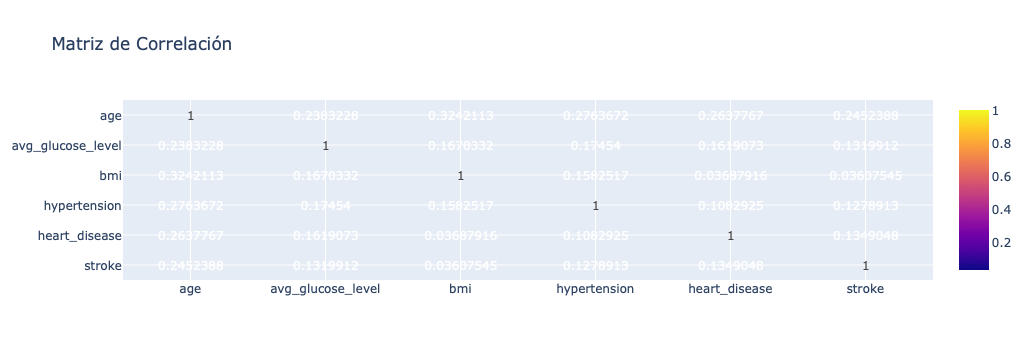

In [268]:
# Correlation matrix
corr = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr()

# Mapa de calor interactivo
fig = px.imshow(corr, text_auto=True, aspect="auto", title='Matriz de Correlación')
fig.show()

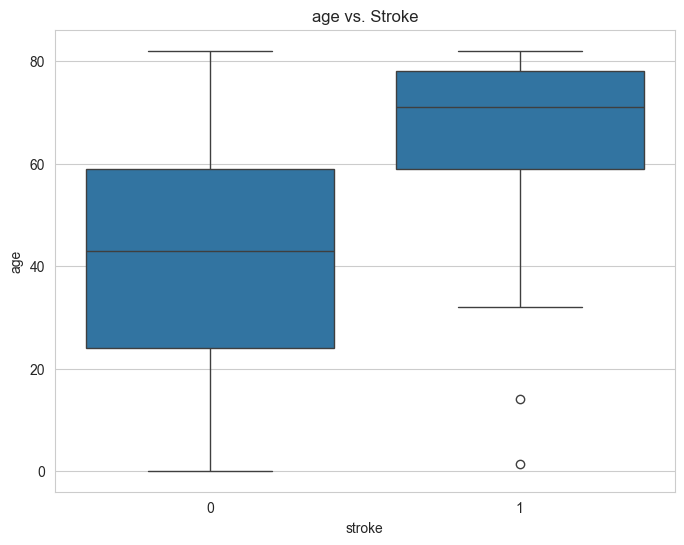

Summary statistics for age by stroke:
         count       mean        std   min   25%   50%   75%   max
stroke                                                            
0       4860.0  41.974831  22.293056  0.08  24.0  43.0  59.0  82.0
1        249.0  67.728193  12.727419  1.32  59.0  71.0  78.0  82.0



In [235]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title(f'{'age'} vs. Stroke')
plt.show()
    
stats = df.groupby('stroke')['age'].describe()
print(f"Summary statistics for {'age'} by stroke:\n{stats}\n")

### **Observations and Patterns**

Based on the provided stroke rates:
#### **Age:**
   - **Stroke cases:** *Mean* 60.08 years, *Median* 63 years, *Std* 16.87.
   - **Non-stroke cases:** *Mean* 43.23 years, *Median* 45 years, *Std* 22.62.
   - The significantly ***higher mean and median ages for stroke cases indicate a strong association with older age***, consistent with medical literature on stroke risk.

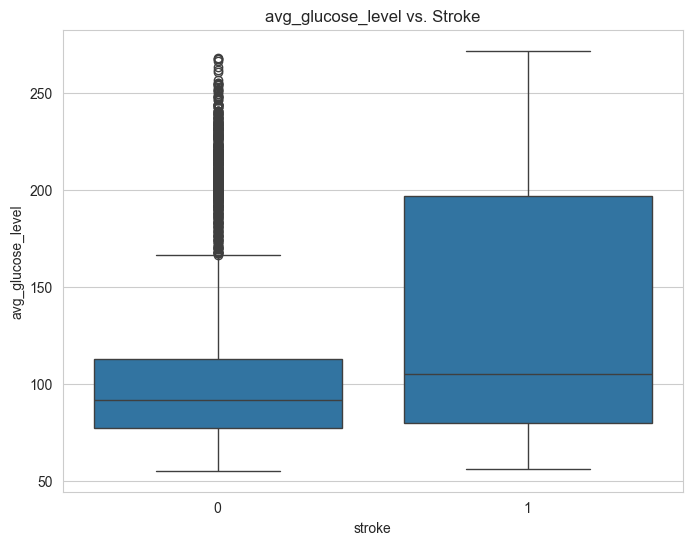

Summary statistics for avg_glucose_level by stroke:
         count        mean        std    min    25%      50%     75%     max
stroke                                                                      
0       4860.0  104.787584  43.847095  55.12  77.12   91.465  112.80  267.76
1        249.0  132.544739  61.921056  56.11  79.79  105.220  196.71  271.74



In [209]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title(f'{'avg_glucose_level'} vs. Stroke')
plt.show()
    
stats = df.groupby('stroke')['avg_glucose_level'].describe()
print(f"Summary statistics for {'avg_glucose_level'} by stroke:\n{stats}\n")

### **Observations and Patterns**

Based on the provided stroke rates:
#### **Average Glucose Level::**
   - **Stroke cases:** *Mean* 118.54 mg/dL, *Median*  105.26 mg/dL, *Std* 59.33.
   - **Non-stroke cases:** *Mean* 106.88 mg/dL, *Median* 92.21 mg/dL, *Std* 46.45.
   - ***Higher glucose levels in stroke cases suggest a link to diabetes*** or pre-diabetes, a known stroke risk factor.

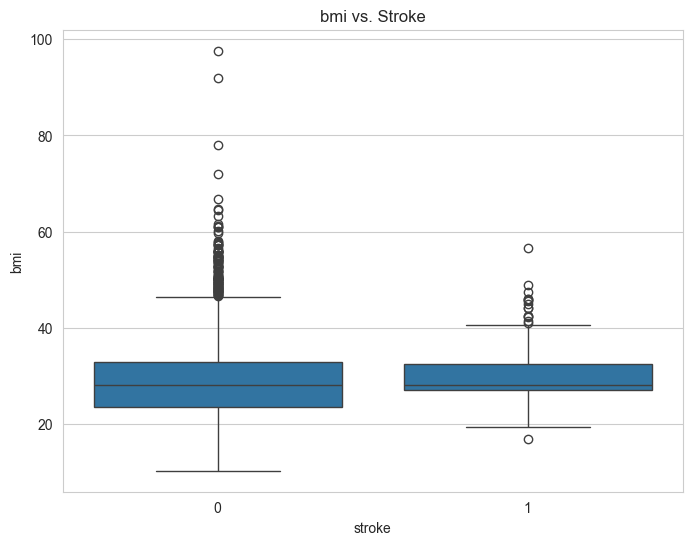

Summary statistics for bmi by stroke:
         count       mean       std   min   25%   50%   75%   max
stroke                                                           
0       4860.0  28.800432  7.777528  10.3  23.6  28.1  32.8  97.6
1        249.0  30.090361  5.861877  16.9  27.0  28.1  32.5  56.6



In [212]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title(f'{'bmi'} vs. Stroke')
plt.show()
    
stats = df.groupby('stroke')['bmi'].describe()
print(f"Summary statistics for {'bmi'} by stroke:\n{stats}\n")

In [271]:
from scipy.stats import chi2_contingency

# Prueba de Chi-cuadrado para género y accidente cerebrovascular
contingency_table = pd.crosstab(df['gender'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-cuadrado para género: estadístico={chi2:.2f}, p-valor={p:.4f}")

# Repetir para otras variables categóricas
for var in ['ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    contingency_table = pd.crosstab(df[var], df['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-cuadrado para {var}: estadístico={chi2:.2f}, p-valor={p:.4f}")

Chi-cuadrado para género: estadístico=0.34, p-valor=0.5598
Chi-cuadrado para ever_married: estadístico=58.87, p-valor=0.0000
Chi-cuadrado para work_type: estadístico=48.00, p-valor=0.0000
Chi-cuadrado para Residence_type: estadístico=1.07, p-valor=0.2998
Chi-cuadrado para smoking_status: estadístico=0.42, p-valor=0.8125


### **Observations and Patterns**

Based on the provided stroke rates:
#### **BMI:**
   - **Stroke cases:** *Mean* 30.91, *Median*   29.7, *Std* 8.71.
   - **Non-stroke cases:** *Mean* 29.15, *Median*27.7, *Std* 11.38.
   - The **slight increase in BMI** for stroke cases ***indicates a weaker association compared to age and glucose levels.***

## **Significance and Non-Linearity**
The boxplots likely show wider spreads for non-stroke cases, particularly for age and glucose, due to their higher variability. Binning age (e.g., <18, 18–40, 40–60, >60) could reveal non-linear patterns, such as a sharp increase in stroke risk for older age groups.
### Feature Engineering Potential
- Bin age to capture non-linear effects (e.g., higher risk above 60 years).
- Retain glucose and BMI outliers as they may represent high-risk individuals with diabetes or obesity.
- Create interaction terms, such as age * avg_glucose_level, to capture combined effects.

# **Section 7 – Correlation Matrix & Multicollinearity**
🎯 **Objective**: 
1. Analyze relationships between numerical variables in the stroke prediction dataset.
2. Identify potential multicollinearity that could affect predictive modeling.
3. Provide insights for variable selection and future analysis.

## **7.1 Target Variable vs. Categorical Variables**
#### Steps:
1. Select numerical variables:
    - Continuous: age, avg_glucose_level, bmi.
    - Binary: hypertension, heart_disease, stroke.
2. Verify no missing values exist after preprocessing (e.g., bmi imputation).

In [217]:
print(df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].isnull().sum())

age                  0
avg_glucose_level    0
bmi                  0
hypertension         0
heart_disease        0
stroke               0
dtype: int64


> We focus on numerical variables relevant to stroke prediction. Continuous variables like age and avg_glucose_level measure patient characteristics, while binary variables like hypertension (0 or 1) are included as they can be treated numerically for correlation analysis. Categorical variables (e.g., gender) are excluded here, as they require alternative methods like Cramer's V.

## **7.2 Calculating the Correlation Matrix**
#### Steps:
- Compute the Pearson correlation matrix to assess linear relationships.

In [221]:
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr()
correlation_matrix

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
age,1.000000,0.238323,0.324211,0.276367,0.263777,0.245239
avg_glucose_level,0.238323,1.000000,0.167033,0.174540,0.161907,0.131991
bmi,0.324211,0.167033,1.000000,0.158252,0.036879,0.036075
hypertension,0.276367,0.174540,0.158252,1.000000,0.108292,0.127891
heart_disease,0.263777,0.161907,0.036879,0.108292,1.000000,0.134905
stroke,0.245239,0.131991,0.036075,0.127891,0.134905,1.000000


>Pearson’s correlation coefficient measures the strength and direction of linear relationships between pairs of variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value near 0 indicates no linear relationship.

## **7.3 Visualizing the Correlation Matrix with a Heatmap**
#### Steps:
- Use a heatmap to visualize correlations clearly and professionally.

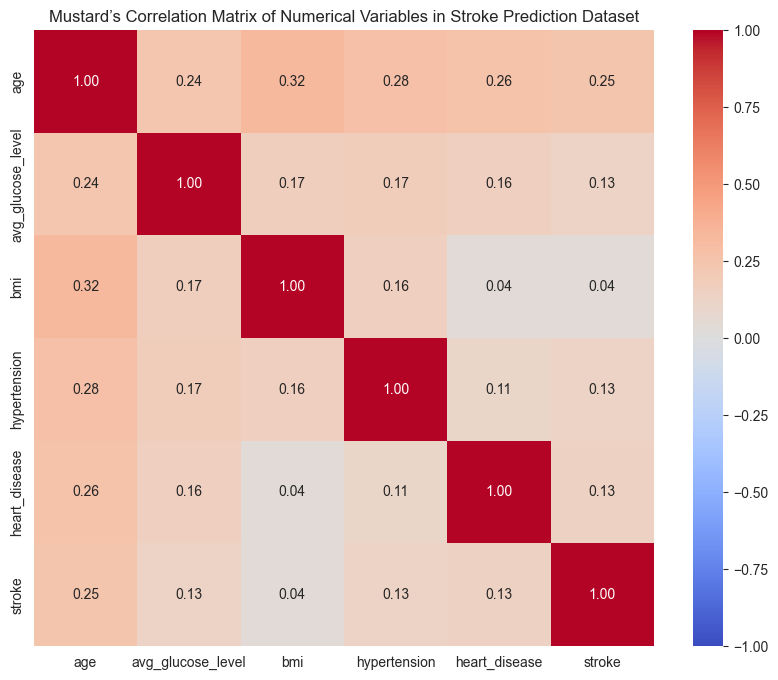

In [225]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Mustard’s Correlation Matrix of Numerical Variables in Stroke Prediction Dataset')
plt.show()


>The heatmap uses the coolwarm colormap to highlight positive (red) and negative (blue) correlations. Annotations (annot=True) display exact values, and fmt='.2f' ensures readability with two decimal places. Saving the figure as an image enhances its utility for reports or portfolios.

## **7.4 Interpreting Correlations**
#### Key Observations:
- ***Relationships with stroke (target variable):***
    - The correlation between `age` and `stroke` is 0.25, indicating a weak to moderate positive relationship. This aligns with the medical understanding that stroke risk increases with age.
    - `avg_glucose_level` and `stroke` have a correlation of 0.13, suggesting a weak positive association. Elevated glucose levels are a known risk factor, but the linear relationship here is not strong.
    - `bmi` and `stroke` show a very weak correlation of 0.04, implying that BMI alone isn’t a significant linear predictor of stroke in this dataset. This is interesting since obesity is often linked to stroke risk, but the relationship might be non-linear or influenced by other factors.
    - `hypertension` and `heart_disease` both have correlations of 0.13 with stroke, showing weak positive associations. These are expected risk factors, though their linear impact appears limited here.
- ***Correlations between predictors:***
    - The strongest correlation among predictors is between `age` and `bmi` (0.32), which is still relatively weak. This suggests that as age increases, BMI tends to rise slightly.
    - `age` also has weak positive correlations with `hypertension` (0.28), `heart_disease` (0.26), and `avg_glucose_level` (0.24). These align with aging being associated with higher risks of these conditions.
    - Other correlations between predictors are very weak, like `bmi` and `heart_disease` (0.04) or `avg_glucose_level` and `hypertension` (0.17).

> The correlation matrix shows a weak to moderate positive correlation (0.25) between age and stroke, consistent with increased stroke risk as age rises. Other variables like avg_glucose_level (0.13), bmi (0.04), hypertension (0.13), and heart_disease (0.13) have weaker correlations with stroke. Among predictors, the strongest correlation is between age and bmi (0.32), but it’s not high enough to indicate multicollinearity. The weak correlations with stroke suggest that no single variable is a strong linear predictor, pointing to the potential need for combined or non-linear approaches in modeling.

## **7.5 Advanced Insights**
#### Additional Considerations:
- **Limitations of Pearson Correlation:**
    - Pearson correlation measures only **linear relationships**. Non-linear patterns, like a possible U-shaped link between `bmi` and stroke risk (where very low or high BMI might increase risk), aren’t captured here.
- **Binary Variables:**
    - For binary variables (`hypertension`, `heart_disease`, `stroke`), the correlations with continuous variables are **point-biserial correlations**. These are valid but should be interpreted cautiously as they reflect associations between binary and continuous data.
- **Alternatives for Non-Linear Relationships:**
    - Consider using **Spearman’s rank correlation** for monotonic relationships or mutual information for more complex dependencies beyond linearity.
- **Correlation vs. Causation:**
    - Correlations (e.g., `age` and `stroke`) suggest associations, not causation. Further analysis like regression or causal inference is needed to explore if these variables directly affect stroke risk.

>These insights show a deeper grasp of statistical methods and their limits, adding analytical depth and suggesting next steps for a robust analysis.

In [251]:
spearman_corr = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr(method='spearman')
print("Matriz de Correlación de Spearman:")
print(spearman_corr)

Matriz de Correlación de Spearman:
                       age  avg_glucose_level       bmi    stroke
age                1.00000           0.145360  0.362650  0.249530
avg_glucose_level  0.14536           1.000000  0.112167  0.082585
bmi                0.36265           0.112167  1.000000  0.050818
stroke             0.24953           0.082585  0.050818  1.000000


# **Section 8 – Initial Insights & Hypotheses**
🎯 **Objective**: 
1. Summarize the key findings from our exploratory data analysis (EDA).
2. Formulate hypotheses based on these findings to guide future analysis or modeling.
3. Demonstrate analytical maturity by connecting observations to domain knowledge and outlining next steps.

## **8.1. Key Findings from EDA**
The EDA uncovered significant patterns relevant to stroke prediction across univariate, bivariate, and correlation analyses:

- **Age Distribution and Stroke Risk:** Age has a bimodal distribution (peaks at 0-5 and 40-50 years) and a moderate positive correlation with stroke (0.25), with higher rates among older individuals.
- **Health and Lifestyle Factors:**
    - Self-employed individuals show the highest stroke rate (7.94%), followed by former smokers (7.91%) compared to current smokers (5.32%) or non-smokers (3.59%).
    - Married individuals have a higher stroke rate (6.56%) than unmarried ones (1.65%), possibly linked to age.
    - Glucose levels and BMI are right-skewed with outliers, but their correlations with stroke are weak (0.13 and 0.04, respectively).
- **Unexpected Insights:**
    - The higher stroke rate among former smokers versus current smokers suggests underlying health conditions rather than smoking itself.
    - The weak correlation between BMI and stroke (0.04) is surprising, given obesity’s known role in stroke risk, hinting at non-linear relationships.

## **8.2. Hypotheses Formulation**
Based on the EDA, the following testable hypotheses are proposed:

- **H1: Age as a Primary Predictor**
    - Individuals over 60 are at least twice as likely to experience a stroke compared to younger age groups.
    - *Justification:* Moderate correlation (0.25) and higher stroke rates in older groups align with medical evidence on age-related stroke risk.

- **H2: Former Smokers and Health Conditions**
    - Former smokers have a higher stroke risk than current or never smokers due to pre-existing conditions that led them to quit.
    - *Justification:* Former smokers’ stroke rate (7.91%) exceeds other groups, suggesting health-driven cessation.

- **H3: Interaction of Hypertension and Heart Disease**
    - The combination of hypertension and heart disease increases stroke risk more than either condition alone.
    - *Justification:* Both have weak correlations (0.13 each), but their interaction may amplify risk.


## **8.3. Validating Hypotheses & Considering Biases**
To test these hypotheses and ensure robust findings:

- **Validation Methods:**
    - **H1:** Use logistic regression with age as a predictor, adjusting for confounders like hypertension and smoking status.
    - **H2:** Perform a stratified analysis by smoking status, addressing the 30.2% "Unknown" category via imputation or exclusion.
    - **H3:** Include an interaction term (e.g., `hypertension` * `heart_disease`) in regression models to test combined effects.
- **Biases and Limitations:**
    - **Class Imbalance:** Only 4.87% of cases are positive for stroke, necessitating oversampling or weighting in models.
    - **Missing Data:** The large "Unknown" smoking status category may introduce bias if not handled carefully.
    - **Survivorship Bias:** Exclusion of fatal strokes could underestimate risk factors.